In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
#from sklearn.metrics import mean_squared_error

Date
2013-03-21    1559.949951
2013-03-22    1542.150024
2013-03-25    1543.349976
2013-03-26    1556.349976
2013-03-28    1575.750000
Name: Close, dtype: float64


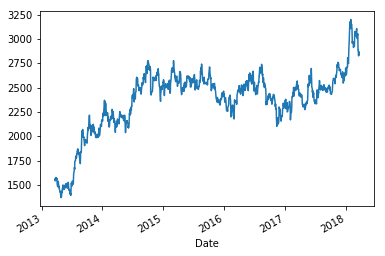

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('complete_data_set/TCS.NS.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data = data["Close"]
print(data.head())
data.plot()
plt.show()

Null Values :- 2
Null Values in modified data:- 0


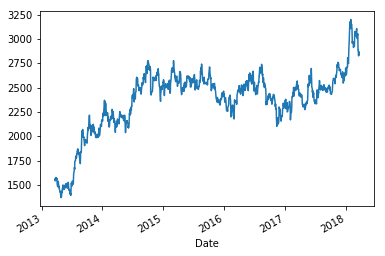

In [6]:
# data clean
sumOfNull = data.isnull().sum()
print('Null Values :-',sumOfNull)
modifiedData = data.dropna()
sumOfNull = modifiedData.isnull().sum()
print('Null Values in modified data:-',sumOfNull)
data.plot()
plt.show()

/usr/lib64/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/lib64/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1228
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6106.756
Method:                       css-mle   S.D. of innovations             34.952
Date:                Tue, 10 Apr 2018   AIC                          12227.512
Time:                        03:06:19   BIC                          12263.304
Sample:                    03-22-2013   HQIC                         12240.979
                         - 03-20-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0633      0.976      1.090      0.276      -0.849       2.976
ar.L1.D.Close     0.0228      0.029      0.801      0.424      -0.033       0.079
ar.L2.D.Close     0.0125      0.028     

/usr/lib64/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


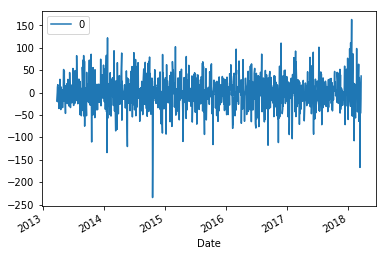

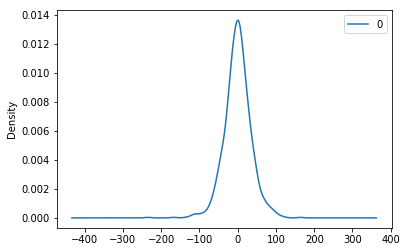

                 0
count  1228.000000
mean      0.001286
std      34.966447
min    -234.378001
25%     -19.403126
50%       0.243621
75%      19.755023
max     163.348396


In [7]:
# fit model
model = ARIMA(modifiedData, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [8]:
#Rolling Forecast ARIMA Model
X = modifiedData.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/usr/lib64/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/lib64/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/lib64/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=2474.093277, expected=2493.100098
predicted=2492.712917, expected=2521.899902
predicted=2519.802656, expected=2445.350098
predicted=2445.176326, expected=2433.449951
predicted=2427.728052, expected=2466.199951
predicted=2467.567136, expected=2494.949951
predicted=2508.615479, expected=2506.050049
predicted=2506.700600, expected=2515.100098
predicted=2511.299578, expected=2558.949951
predicted=2558.304117, expected=2552.600098
predicted=2553.617403, expected=2577.550049
predicted=2576.937780, expected=2619.250000
predicted=2617.194248, expected=2619.300049
predicted=2622.625794, expected=2708.250000
predicted=2707.468240, expected=2699.199951
predicted=2698.134802, expected=2656.300049
predicted=2654.636136, expected=2652.000000
predicted=2641.152623, expected=2649.100098
predicted=2655.225391, expected=2649.500000
predicted=2656.287166, expected=2650.199951
predicted=2651.194469, expected=2675.399902
predicted=2677.793035, expected=2709.899902
predicted=2712.749998, expected=

predicted=2315.138764, expected=2308.800049
predicted=2313.241721, expected=2299.149902
predicted=2306.446019, expected=2325.500000
predicted=2326.990326, expected=2310.800049
predicted=2311.916229, expected=2328.100098
predicted=2329.777478, expected=2311.500000
predicted=2308.964313, expected=2310.350098
predicted=2313.020655, expected=2302.649902
predicted=2301.093945, expected=2273.149902
predicted=2275.317214, expected=2289.899902
predicted=2290.619258, expected=2337.300049
predicted=2341.090514, expected=2330.100098
predicted=2334.106713, expected=2320.500000
predicted=2317.429891, expected=2342.449951
predicted=2338.960801, expected=2352.550049
predicted=2356.121967, expected=2332.449951
predicted=2333.319709, expected=2349.449951
predicted=2347.691632, expected=2360.649902
predicted=2361.688653, expected=2365.100098
predicted=2368.455022, expected=2429.149902
predicted=2429.384563, expected=2455.350098
predicted=2456.815410, expected=2536.199951
predicted=2539.115643, expected=

predicted=2777.179660, expected=2746.100098
predicted=2736.008117, expected=2850.850098
predicted=2858.461790, expected=2888.949951
predicted=2892.560518, expected=2918.199951
predicted=2921.252916, expected=2959.300049
predicted=2949.965390, expected=3116.399902
predicted=3121.558024, expected=3102.000000
predicted=3101.537354, expected=3174.600098
predicted=3173.738394, expected=3121.050049
predicted=3109.183580, expected=3198.850098
predicted=3204.601923, expected=3152.850098
predicted=3149.964485, expected=3112.350098
predicted=3116.317182, expected=3138.600098
predicted=3133.170112, expected=3153.649902
predicted=3161.407098, expected=3103.199951
predicted=3105.959673, expected=2997.250000
predicted=2992.299250, expected=2955.050049
predicted=2953.552262, expected=2974.199951
predicted=2981.099995, expected=2971.699951
predicted=2980.730536, expected=2967.300049
predicted=2969.059757, expected=2911.800049
predicted=2909.050781, expected=2925.850098
predicted=2927.232540, expected=

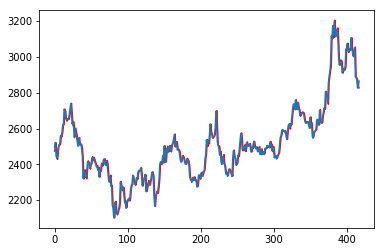

In [9]:
# plot
plt.plot(predictions, color='red')
plt.plot(test)
plt.show()